In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('./hour.csv')
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [3]:
df2 = pd.read_csv('./day.csv')
df2.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# statistical info
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

## Preprocessing the dataset

In [6]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# renaming some attributes:

df = df.rename(columns = {'yr':'year',
                          'mnth':'month',
                          'hr':'hour',
                          'hum':'humidity',
                          'weathersit':'weather',
                          'cnt':'count'})
df.head()

instant      dteday  season  year  month  hour  holiday  weekday  \
0        1  2011-01-01       1     0      1     0        0        6   
1        2  2011-01-01       1     0      1     1        0        6   
2        3  2011-01-01       1     0      1     2        0        6   
3        4  2011-01-01       1     0      1     3        0        6   
4        5  2011-01-01       1     0      1     4        0        6   

   workingday  weather  temp   atemp  humidity  windspeed  casual  registered  \
0           0        1  0.24  0.2879      0.81        0.0       3          13   
1           0        1  0.22  0.2727      0.80        0.0       8          32   
2           0        1  0.22  0.2727      0.80        0.0       5          27   
3           0        1  0.24  0.2879      0.75        0.0       3          10   
4           0        1  0.24  0.2879      0.75        0.0       0           1   

   count  
0     16  
1     40  
2     32  
3     13  
4      1

In [8]:
# dropping some attributes that we don't need 
# df = df.drop(columns=['instant','dteday','year'])
df = df.drop(columns=['instant'])
df2= df2.drop(columns=['instant'])

In [9]:
# change int columns to category types
cols = ['season','month','hour','holiday','workingday','weather']


for col in cols:
    df[col] = df[col].astype('category')
# to see the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dteday      17379 non-null  object  
 1   season      17379 non-null  category
 2   year        17379 non-null  int64   
 3   month       17379 non-null  category
 4   hour        17379 non-null  category
 5   holiday     17379 non-null  category
 6   weekday     17379 non-null  int64   
 7   workingday  17379 non-null  category
 8   weather     17379 non-null  category
 9   temp        17379 non-null  float64 
 10  atemp       17379 non-null  float64 
 11  humidity    17379 non-null  float64 
 12  windspeed   17379 non-null  float64 
 13  casual      17379 non-null  int64   
 14  registered  17379 non-null  int64   
 15  count       17379 non-null  int64   
dtypes: category(6), float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [10]:
data_copy=df.copy()

In [11]:
day_copy=df2.copy()

# Exploratory Data Analysis

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

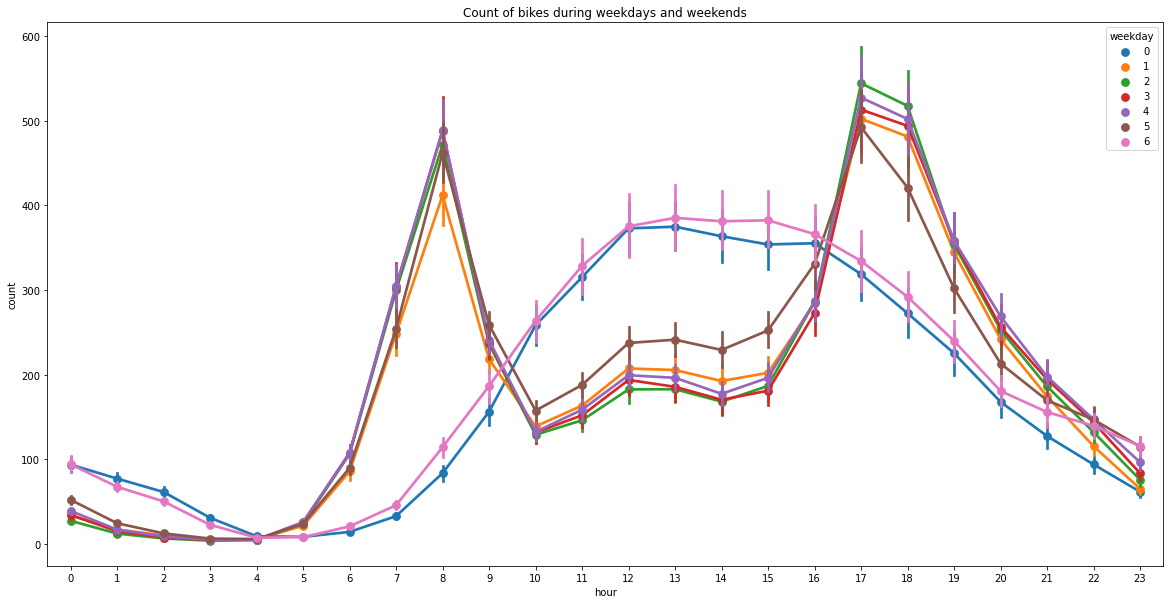

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data_copy,x='hour',y='count',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: unregistered users')]

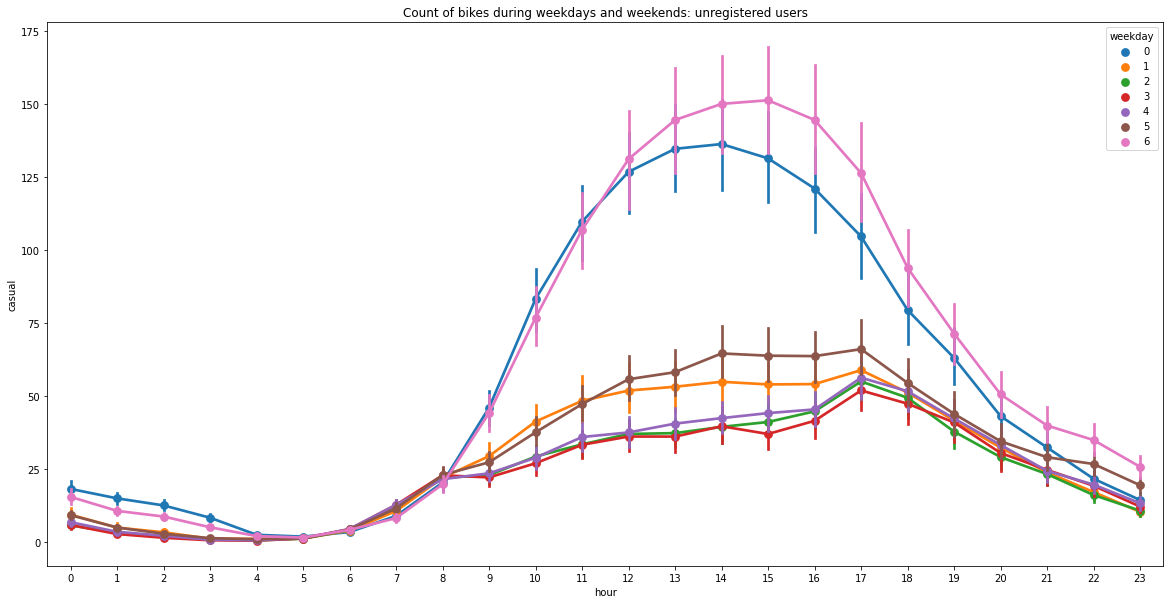

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data_copy,x='hour',y='casual',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: registered users')]

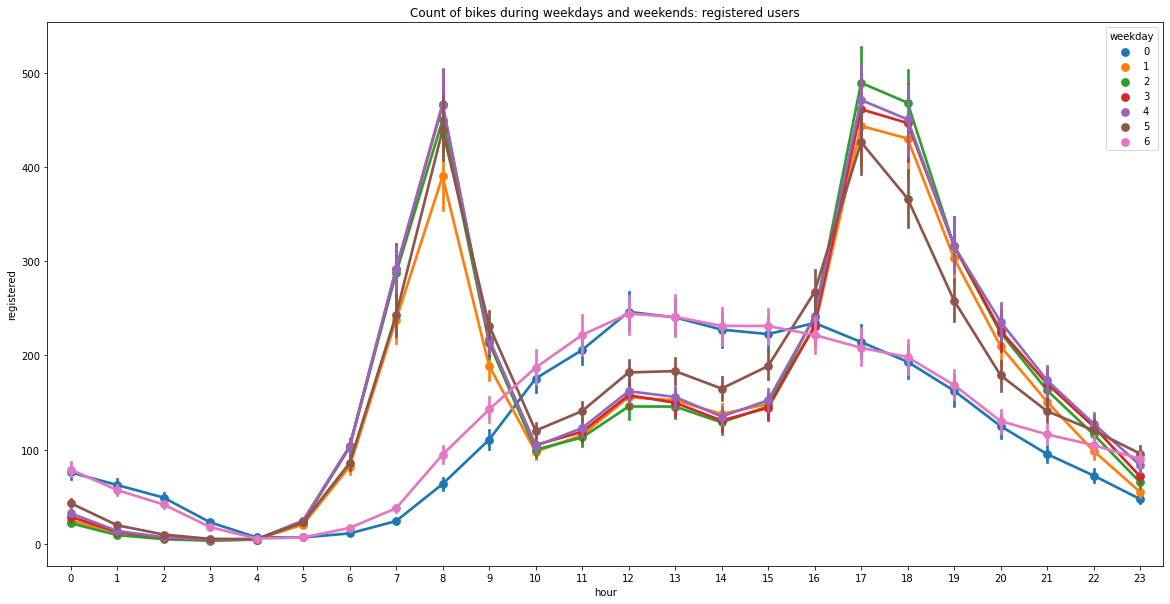

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data_copy,x='hour',y='registered',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: registered users')

[Text(0.5, 1.0, 'Count of bikes during weather')]

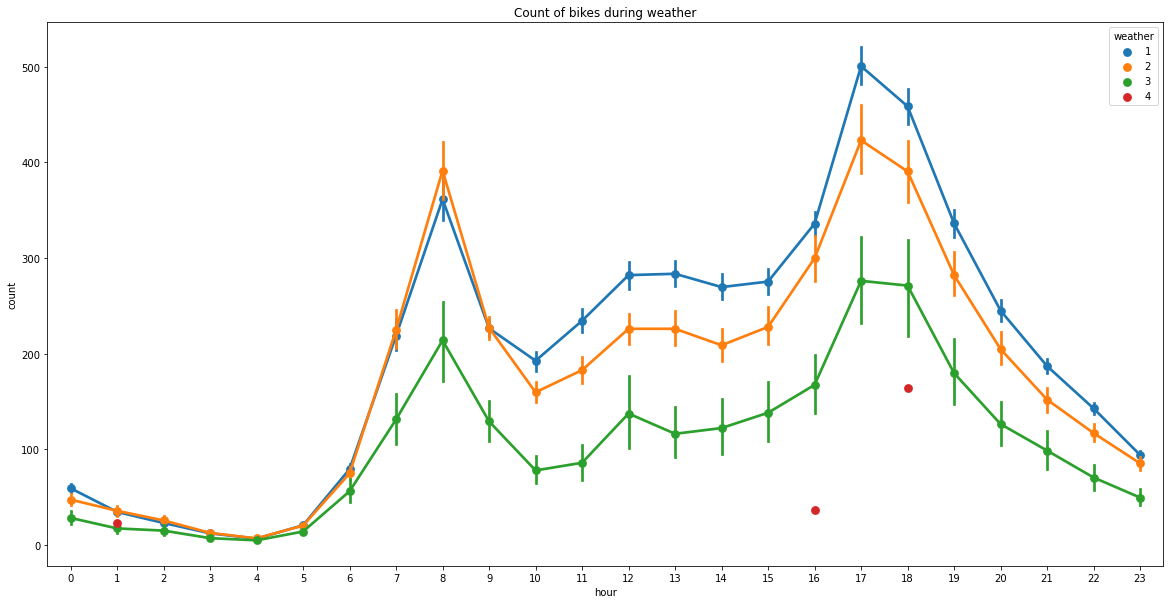

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data_copy,x='hour',y='count',hue='weather',ax=ax)
ax.set(title='Count of bikes during weather')

=> so here we have 4 different typs of weather 
at 4:00 pm and 6:00 pm => we have less numbers of users that are most likely in heavy rain weather

-> green graph is most likely for cloudy or shower rain

[Text(0.5, 1.0, 'Count of bikes during seasons')]

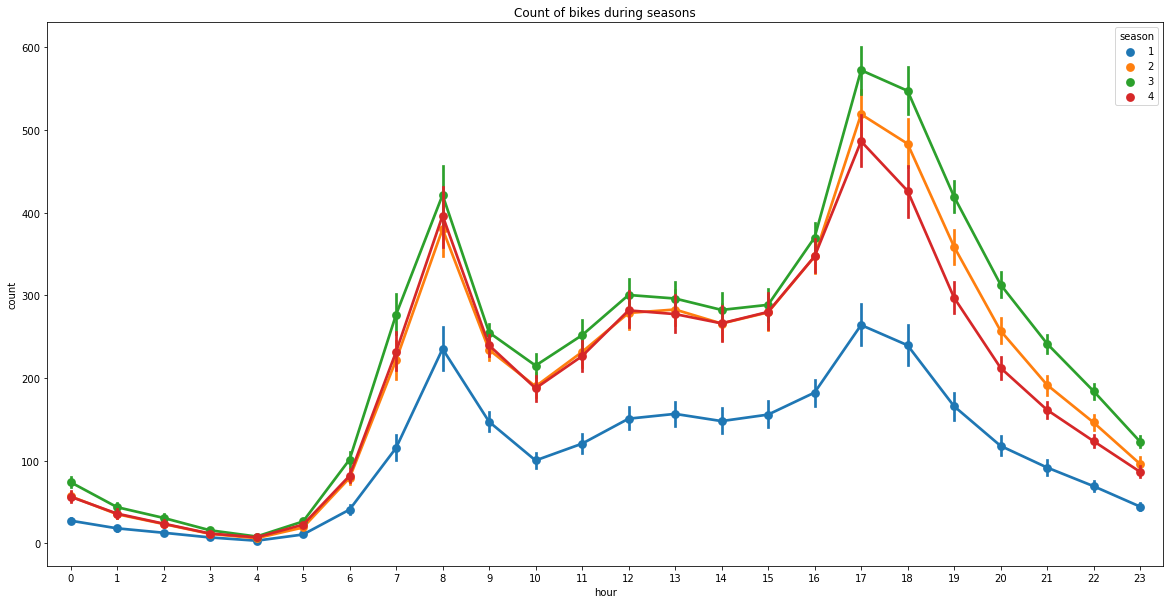

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data_copy,x='hour',y='count',hue='season',ax=ax)
ax.set(title='Count of bikes during seasons')

we have here 4 numbers of seasons
only one of them is lower at bike counts => 'blue graph' => might be winter

[Text(0.5, 1.0, 'Count of bikes during months')]

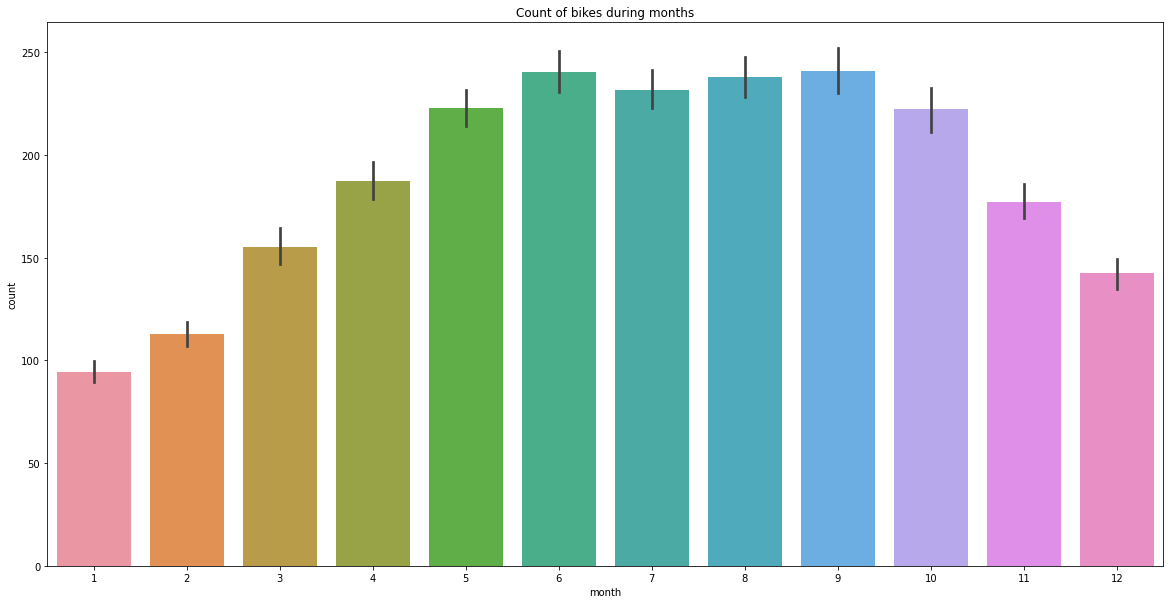

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data_copy,x='month',y='count',ax=ax)
ax.set(title='Count of bikes during months')

[Text(0.5, 1.0, 'Count of bikes during days')]

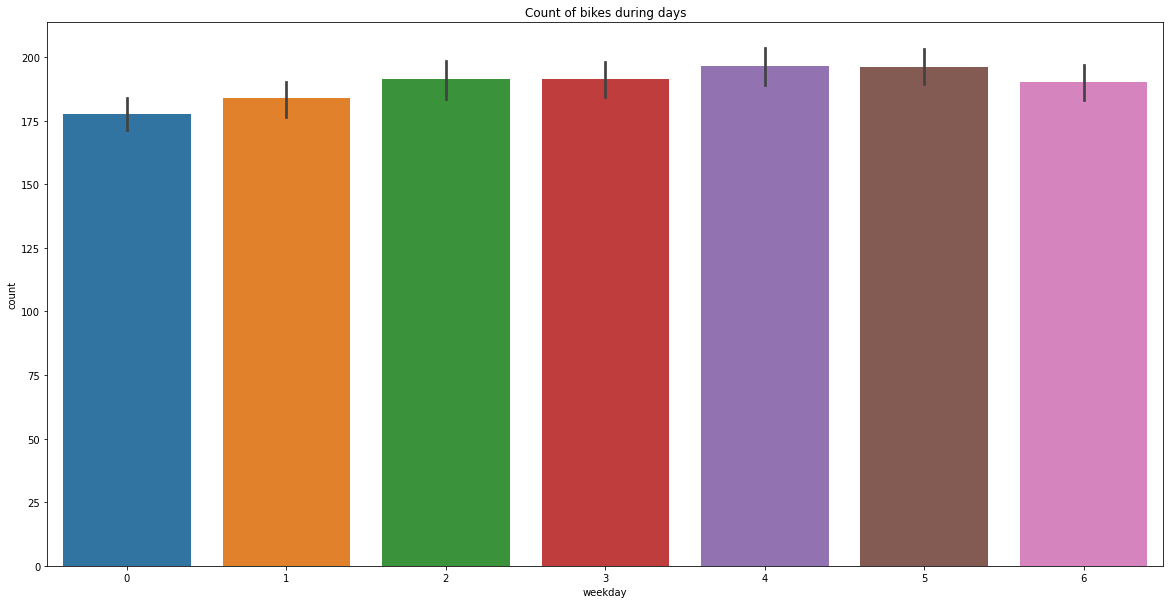

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data_copy,x='weekday',y='count',ax=ax)
ax.set(title='Count of bikes during days')

[Text(0.5, 1.0, 'Relation between humidity and users')]

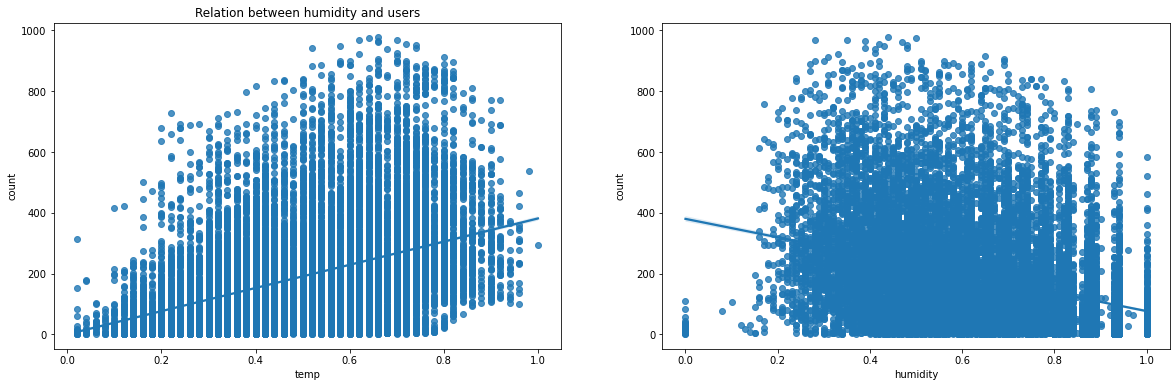

In [19]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.regplot(x=data_copy['temp'],y=data_copy['count'],ax=ax1)
ax1.set(title='Relation between temp and users')
sns.regplot(x=data_copy['humidity'],y=data_copy['count'],ax=ax2)
ax1.set(title='Relation between humidity and users')

when humidity increases, users decreases
when temp increases, users increases

C:\Users\maria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

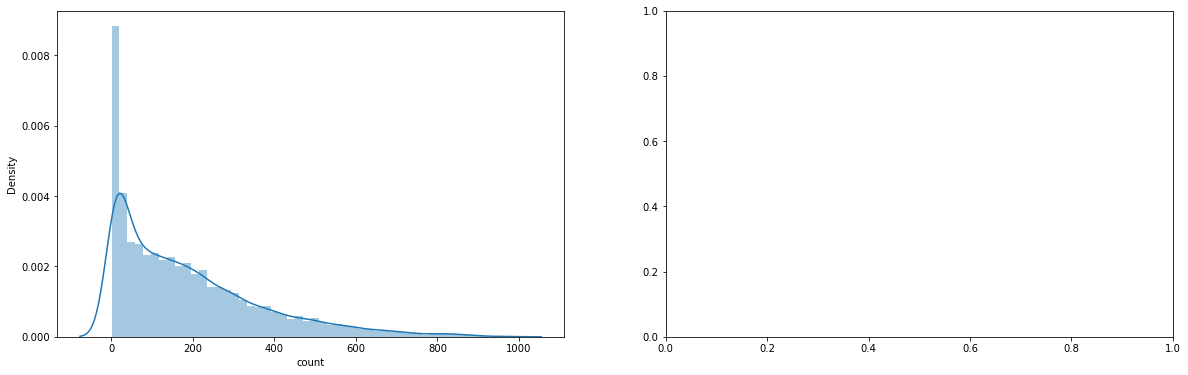

In [20]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.distplot(data_copy['count'],ax=ax1)

# Corelation Matrix

<AxesSubplot:>

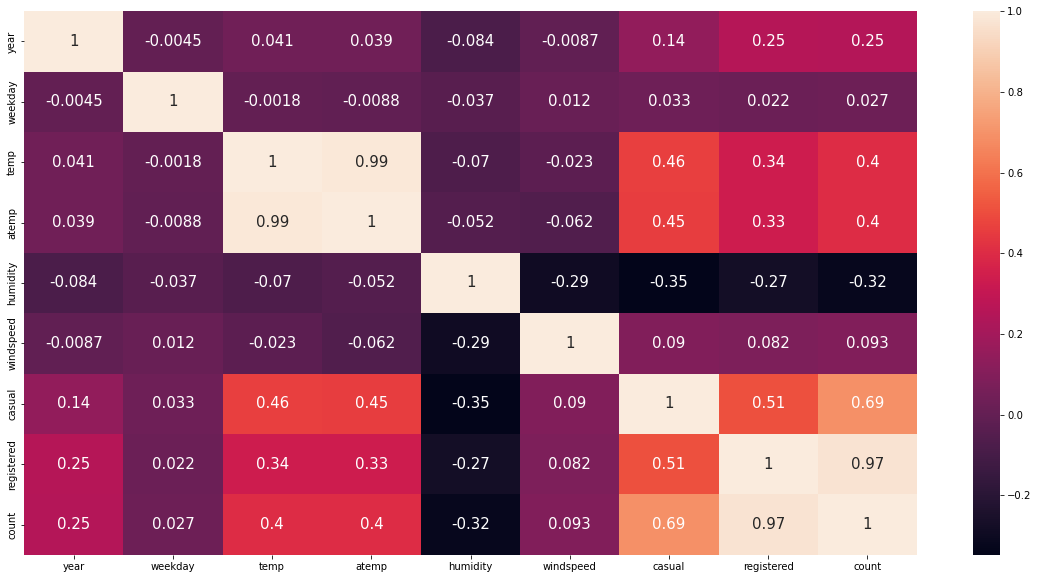

In [21]:
corr= data_copy.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,annot_kws={'size':15})

# one hot encoding 

In [22]:
pd.get_dummies(data_copy['season'],prefix='season')

season_1  season_2  season_3  season_4
0             1         0         0         0
1             1         0         0         0
2             1         0         0         0
3             1         0         0         0
4             1         0         0         0
...         ...       ...       ...       ...
17374         1         0         0         0
17375         1         0         0         0
17376         1         0         0         0
17377         1         0         0         0
17378         1         0         0         0

[17379 rows x 4 columns]

In [23]:
df_OHE = df

def one_hot_encoding(data,column):
    data=pd.concat([data,pd.get_dummies(data[column],prefix=column)],axis=1)
    data=data.drop([column],axis=1)
    return data

cols = ['season','month','hour','holiday','workingday','weather']


for col in cols:
    df_OHE = one_hot_encoding(df_OHE,col)
# to see the changes
df_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        17379 non-null  object 
 1   year          17379 non-null  int64  
 2   weekday       17379 non-null  int64  
 3   temp          17379 non-null  float64
 4   atemp         17379 non-null  float64
 5   humidity      17379 non-null  float64
 6   windspeed     17379 non-null  float64
 7   casual        17379 non-null  int64  
 8   registered    17379 non-null  int64  
 9   count         17379 non-null  int64  
 10  season_1      17379 non-null  uint8  
 11  season_2      17379 non-null  uint8  
 12  season_3      17379 non-null  uint8  
 13  season_4      17379 non-null  uint8  
 14  month_1       17379 non-null  uint8  
 15  month_2       17379 non-null  uint8  
 16  month_3       17379 non-null  uint8  
 17  month_4       17379 non-null  uint8  
 18  month_5       17379 non-nu

In [24]:
df_OHE.head()

dteday  year  weekday  temp   atemp  humidity  windspeed  casual  \
0  2011-01-01     0        6  0.24  0.2879      0.81        0.0       3   
1  2011-01-01     0        6  0.22  0.2727      0.80        0.0       8   
2  2011-01-01     0        6  0.22  0.2727      0.80        0.0       5   
3  2011-01-01     0        6  0.24  0.2879      0.75        0.0       3   
4  2011-01-01     0        6  0.24  0.2879      0.75        0.0       0   

   registered  count  ...  hour_22  hour_23  holiday_0  holiday_1  \
0          13     16  ...        0        0          1          0   
1          32     40  ...        0        0          1          0   
2          27     32  ...        0        0          1          0   
3          10     13  ...        0        0          1          0   
4           1      1  ...        0        0          1          0   

   workingday_0  workingday_1  weather_1  weather_2  weather_3  weather_4  
0             1             0          1          0          0          0  
1             1             0          1          0          0          0  
2             1             0          1          0          0          0  
3             1             0          1          0          0          0  
4             1             0          1          0          0          0  

[5 rows x 58 columns]

In [25]:
data_copy.head(1)

dteday season  year month hour holiday  weekday workingday weather  \
0  2011-01-01      1     0     1    0       0        6          0       1   

   temp   atemp  humidity  windspeed  casual  registered  count  
0  0.24  0.2879      0.81        0.0       3          13     16

## some other data Visualization

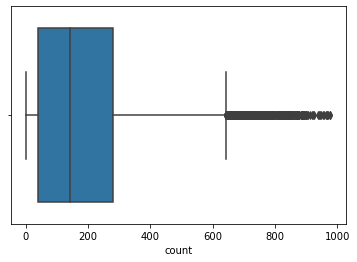

In [26]:
# Boxplot of count
sns.boxplot(data=data_copy,x='count')
plt.show()

From the boxplot of count column, it is clearly visible that most of the data lies between 30 to 300 and a huge numbers of outliers are present in the plot.

C:\Users\maria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

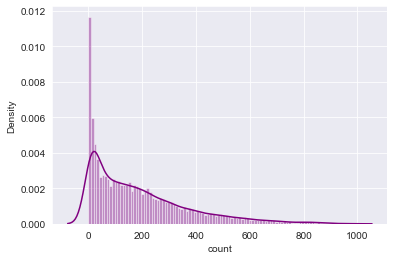

In [27]:
# Histogram of count
sns.set_style('darkgrid')
sns.distplot(data_copy['count'],bins=100,color='purple')

from the graph it is shown that the count data is skewed at the left side. the density of values is more between 0 and 200.

['holiday', 'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
['atemp', 'humidity', 'windspeed']


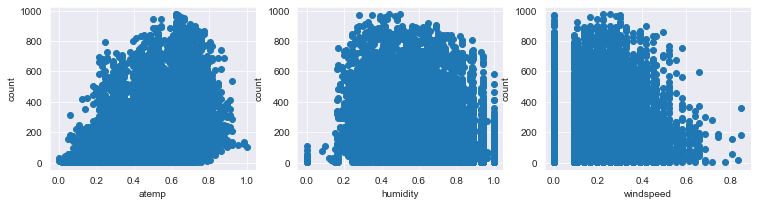

In [28]:
# Scatter plot between count & each numeric features
fields =[f for f in data_copy]
fields = fields[5:-3]
print(fields)


print(fields[5:])
fig = plt.figure(figsize=(17,3))

for i,f in enumerate(fields[5:]):
    ax=fig.add_subplot(1,4,i+1)
    ax.scatter(data_copy[f],data_copy['count'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)
plt.show()

the distribution between the numeric columns and count has been soread over the entire area wich means that the relationship between them is not so specific

[Text(0.5, 0, 'weather'), Text(0, 0.5, 'count')]

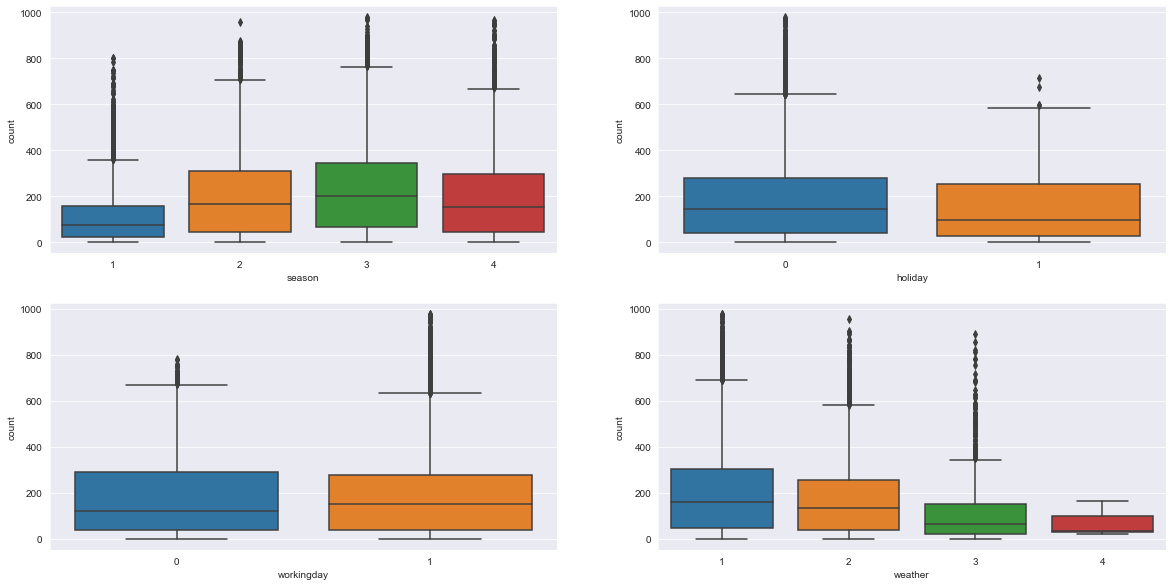

In [29]:
# Boxplot between count & each categorical features
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)

sns.boxplot(data=data_copy,x='season',y='count',ax=axes[0][0])
sns.boxplot(data=data_copy,x='holiday',y='count',ax=axes[0][1])
sns.boxplot(data=data_copy,x='workingday',y='count',ax=axes[1][0])
sns.boxplot(data=data_copy,x='weather',y='count',ax=axes[1][1])

axes[0][0].set(xlabel='season',ylabel='count')
axes[0][1].set(xlabel='holiday',ylabel='count')
axes[1][0].set(xlabel='workingday',ylabel='count')
axes[1][1].set(xlabel='weather',ylabel='count')

<AxesSubplot:>

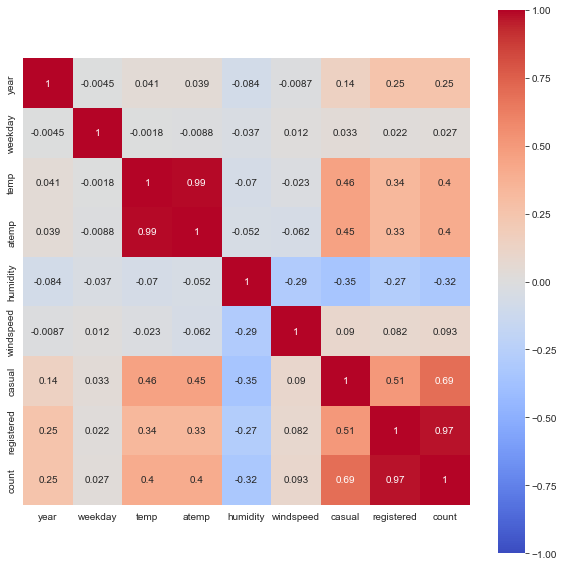

In [30]:
# corelation between each features

plt.figure(figsize=(10,10))
sns.heatmap(data_copy.corr('pearson'),vmin=-1,vmax=1,cmap='coolwarm',annot=True,square=True)

# 4. Data Preprocessing

#### what we have to do:
    

In [31]:
#  convert dteday column to each elements(year,month,day,dayofweek,hour)

data_copy['dteday']=pd.to_datetime(data_copy['dteday'])
day_copy['dteday']=pd.to_datetime(day_copy['dteday'])
data_copy.head()

dteday season  year month hour holiday  weekday workingday weather  \
0 2011-01-01      1     0     1    0       0        6          0       1   
1 2011-01-01      1     0     1    1       0        6          0       1   
2 2011-01-01      1     0     1    2       0        6          0       1   
3 2011-01-01      1     0     1    3       0        6          0       1   
4 2011-01-01      1     0     1    4       0        6          0       1   

   temp   atemp  humidity  windspeed  casual  registered  count  
0  0.24  0.2879      0.81        0.0       3          13     16  
1  0.22  0.2727      0.80        0.0       8          32     40  
2  0.22  0.2727      0.80        0.0       5          27     32  
3  0.24  0.2879      0.75        0.0       3          10     13  
4  0.24  0.2879      0.75        0.0       0           1      1

In [32]:
day_copy.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1        0        6           0           2   
1 2011-01-02       1   0     1        0        0           0           2   
2 2011-01-03       1   0     1        0        1           1           1   
3 2011-01-04       1   0     1        0        2           1           1   
4 2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600

In [33]:
def split_datetime(df):
    df['year']=df['dteday'].apply(lambda t:t.year)
    df['month']=df['dteday'].apply(lambda t:t.month)    
    df['day']=df['dteday'].apply(lambda t:t.day)    
    df['dayofweek']=df['dteday'].apply(lambda t:t.dayofweek)
    df['hour']=df['dteday'].apply(lambda t:t.hour)
    df=df.drop(['dteday'],axis=1)
    return df

In [34]:
day_copy = day_copy.rename(columns = {'yr':'year',
                          'mnth':'month',
                          'hr':'hour',
                          'hum':'humidity',
                          'weathersit':'weather',
                          'cnt':'count'})
day_copy.head()

dteday  season  year  month  holiday  weekday  workingday  weather  \
0 2011-01-01       1     0      1        0        6           0        2   
1 2011-01-02       1     0      1        0        0           0        2   
2 2011-01-03       1     0      1        0        1           1        1   
3 2011-01-04       1     0      1        0        2           1        1   
4 2011-01-05       1     0      1        0        3           1        1   

       temp     atemp  humidity  windspeed  casual  registered  count  
0  0.344167  0.363625  0.805833   0.160446     331         654    985  
1  0.363478  0.353739  0.696087   0.248539     131         670    801  
2  0.196364  0.189405  0.437273   0.248309     120        1229   1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454   1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518   1600

In [35]:
data_copy=split_datetime(data_copy)
day_copy=split_datetime(day_copy)

data_copy=data_copy.drop(['casual','registered'],axis=1)
# day_copy=day_copy.drop(['casual','registered'])

In [36]:
data_copy.head()

season  year  month  hour holiday  weekday workingday weather  temp   atemp  \
0      1  2011      1     0       0        6          0       1  0.24  0.2879   
1      1  2011      1     0       0        6          0       1  0.22  0.2727   
2      1  2011      1     0       0        6          0       1  0.22  0.2727   
3      1  2011      1     0       0        6          0       1  0.24  0.2879   
4      1  2011      1     0       0        6          0       1  0.24  0.2879   

   humidity  windspeed  count  day  dayofweek  
0      0.81        0.0     16    1          5  
1      0.80        0.0     40    1          5  
2      0.80        0.0     32    1          5  
3      0.75        0.0     13    1          5  
4      0.75        0.0      1    1          5

<AxesSubplot:xlabel='hour', ylabel='count'>

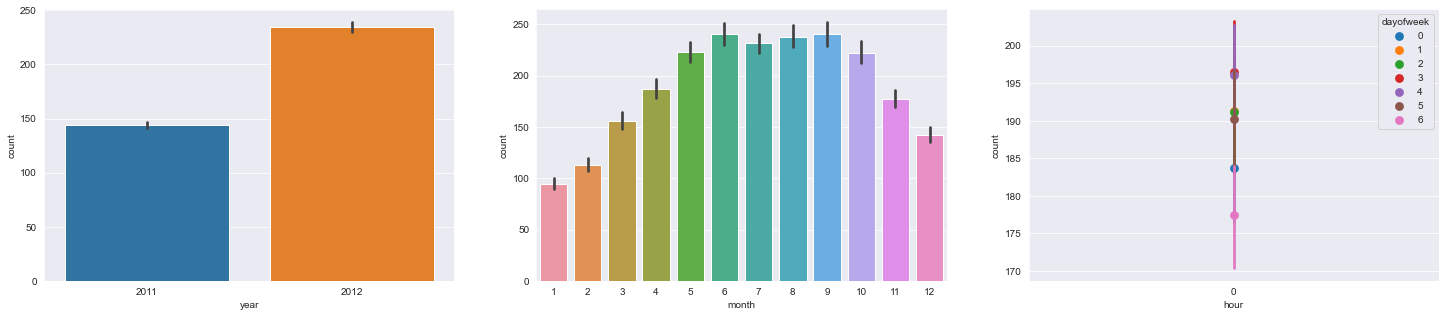

In [37]:
# barplot between year,month and count , and pointplot between hour and count
fig,axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(25,5)
sns.barplot(data=data_copy,x='year',y='count',ax=axes[0])
sns.barplot(data=data_copy,x='month',y='count',ax=axes[1])
sns.pointplot(data=data_copy,x='hour',y='count',ax=axes[2],hue='dayofweek')

In [38]:
sns.pointplot(data=data_copy,x='hour',y='count',ax=axes[2],hue='dayofweek')
# sns.pointplot(data=data_copy,x='hour',y='count',hue='weather',ax=ax)

<AxesSubplot:xlabel='hour', ylabel='count'>

C:\Users\maria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

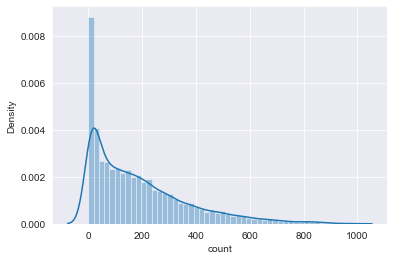

In [39]:
# count column looks skew
sns.distplot(data_copy['count'])

more data are being presented on the left side 

In [40]:
# take a log for count column
data_copy['count']=np.log1p(data_copy['count'])

C:\Users\maria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

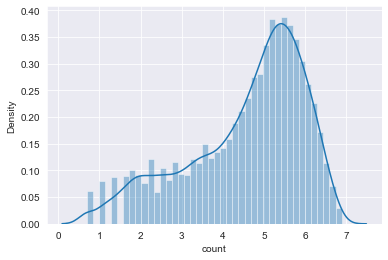

In [41]:
# check again by count column looks skew
sns.distplot(data_copy['count'])

now the skewness has been removed, the data is more distributed, but not more extend but it's better

In [42]:
# eliminate outliers from various fetures (with residual less than stdev*3)
# we will be just consider values whos error is less than standard diviation 3 times
# because 99% of data is presented between std into 3, so we will get the max amount of data in the major data


# data_copy=data_copy[np.abs(data_copy['count'])-data_copy['count'].mean() <-(3*data_copy['count'].std())]

In [43]:
# check it using box plot
# sns.boxplot(data=data_copy,x='count')
# plt.show()

# plotly visualization

In [44]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   year        17379 non-null  int64   
 2   month       17379 non-null  int64   
 3   hour        17379 non-null  int64   
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  int64   
 6   workingday  17379 non-null  category
 7   weather     17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  humidity    17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  count       17379 non-null  float64 
 13  day         17379 non-null  int64   
 14  dayofweek   17379 non-null  int64   
dtypes: category(4), float64(5), int64(6)
memory usage: 1.5 MB


In [45]:
px.histogram(data_copy['temp'])

In [46]:
px.histogram(data_copy['atemp'])

In [47]:
px.histogram(data_copy['humidity'])

In [48]:
px.histogram(data_copy['windspeed'])

In [49]:
# data=data_copy,x='year',y='count'
px.bar(data_copy,x='year' , y='count')

In [50]:
# data=data_copy,x='month',y='count',ax=axes[1]
px.bar(data_copy,x='month' , y='count')

In [51]:
px.pie(data_frame=data_copy,
      names=data_copy.groupby('season').sum()['temp'].index,
     values=data_copy.groupby('season').sum()['temp'].values,
      hole=0.5)

In [52]:
px.pie(data_frame=data_copy,
      names=data_copy.groupby('season').sum()['count'].index,
     values=data_copy.groupby('season').sum()['count'].values,
      hole=0.5)

In [53]:
px.pie(data_frame=data_copy,
      names=data_copy.groupby('year').sum()['count'].index,
     values=data_copy.groupby('year').sum()['count'].values,
      hole=0.3)

In [54]:
data_copy.to_csv('cleaned_hour')

In [55]:
day_copy.to_csv('cleaned_day')